#**Telecom X - Análisis de Evasión de Clientes** 📡

**Autor:** Jose Arturo Gomez Eugenio

**Fecha:** 28 de Junio del 2025

La compañía está experimentando un elevado número de bajas de suscriptores y requiere identificar las razones detrás de esta problemática.

El ánalisis contiene:

*   Importación y manipulación de datos desde una API.
*   Implementación de procesos ETL (Extracción, Transformación y Carga) para el acondicionamiento de la información.
*   Creación de visualizaciones estratégicas para identificar patrones y tendencias.
*   Análisis Exploratorio de Datos (EDA) y reporte con hallazgos estratégicos.

#📌 Extracción

In [30]:
import pandas as pd
import requests
import json
import numpy as np

In [31]:
#accediedo a la API
df = requests.get('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')

#recuperando los resultados
resultado = json.loads(df.text)

##obteniendo vista previa del df
df = pd.DataFrame(resultado)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

###Estandarización de datos anidados



In [32]:
id_churn = df[['customerID', 'Churn']]
id_churn

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes
...,...,...
7262,9987-LUTYD,No
7263,9992-RRAMN,Yes
7264,9992-UJOEL,No
7265,9993-LHIEB,No


In [33]:
customer = pd.json_normalize(df['customer'])
phone = pd.json_normalize(df['phone'])
internet = pd.json_normalize(df['internet'])
account = pd.json_normalize(df['account'])

#concatenando para crear el df base

telecom_df = pd.concat([id_churn, customer, phone, internet, account], axis=1)
telecom_df.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
556,0794-YVSGE,No,Male,0,Yes,Yes,72,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.30,1401.15
842,1195-UQFHQ,,Male,0,No,No,61,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,One year,No,Electronic check,104.00,6363.45
1101,1557-EMYVT,No,Female,0,No,No,43,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),115.05,4895.1
4457,6114-TCFID,No,Female,0,No,No,29,No,No phone service,DSL,...,Yes,No,Yes,No,No,One year,No,Credit card (automatic),39.50,1082.75
2411,3370-HXOPH,No,Female,0,No,No,3,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Electronic check,76.10,257.6


###Exploración inicial del dataset: columnas y tipos de datos

In [34]:
#renombrando columnas
telecom_df.rename(columns={
    'customerID': 'id_cliente',
    'gender': 'genero',
    'SeniorCitizen': 'es_ciudadano_senior',
    'Partner': 'tiene_pareja',
    'Dependents': 'tiene_dependientes',
    'tenure': 'meses_en_empresa',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'tipo_internet',
    'OnlineSecurity': 'seguridad_online',
    'OnlineBackup': 'respaldo_online',
    'DeviceProtection': 'proteccion_dispositivo',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'tv_streaming',
    'StreamingMovies': 'peliculas_streaming',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'factura_electronica',
    'PaymentMethod': 'metodo_pago',
    'Charges.Monthly': 'cargos_mensuales',
    'Charges.Total': 'cargos_totales',
    'Churn': 'abandono'
}, inplace=True)

telecom_df.head()

,id_cliente,abandono,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,...,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,cargos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [35]:
telecom_df.columns

Index(['id_cliente', 'abandono', 'genero', 'es_ciudadano_senior',
       'tiene_pareja', 'tiene_dependientes', 'meses_en_empresa',
       'servicio_telefonico', 'lineas_multiples', 'tipo_internet',
       'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
       'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
       'tipo_contrato', 'factura_electronica', 'metodo_pago',
       'cargos_mensuales', 'cargos_totales'],
      dtype='object')

In [36]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   abandono                7267 non-null   object 
 2   genero                  7267 non-null   object 
 3   es_ciudadano_senior     7267 non-null   int64  
 4   tiene_pareja            7267 non-null   object 
 5   tiene_dependientes      7267 non-null   object 
 6   meses_en_empresa        7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   object 
 8   lineas_multiples        7267 non-null   object 
 9   tipo_internet           7267 non-null   object 
 10  seguridad_online        7267 non-null   object 
 11  respaldo_online         7267 non-null   object 
 12  proteccion_dispositivo  7267 non-null   object 
 13  soporte_tecnico         7267 non-null   object 
 14  tv_streaming            7267 non-null   

In [37]:
#verificando que no existan datos null
telecom_df.isnull().sum()

,0
id_cliente,0
abandono,0
genero,0
es_ciudadano_senior,0
tiene_pareja,0
tiene_dependientes,0
meses_en_empresa,0
servicio_telefonico,0
lineas_multiples,0
tipo_internet,0


In [38]:
#verificación de valores duplicados
print(telecom_df.duplicated().sum())

0


In [39]:
#verificando errores de formato
for col in ['id_cliente', 'abandono', 'genero', 'es_ciudadano_senior',
       'tiene_pareja', 'tiene_dependientes', 'meses_en_empresa',
       'servicio_telefonico', 'lineas_multiples', 'tipo_internet',
       'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
       'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
       'tipo_contrato', 'factura_electronica', 'metodo_pago',
       'cargos_mensuales', 'cargos_totales']:
    print(f"Valores únicos para la columna '{col}':")
    print(telecom_df[col].unique())
    print("-" * 20)

Valores únicos para la columna 'id_cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------
Valores únicos para la columna 'abandono':
['No' 'Yes' '']
--------------------
Valores únicos para la columna 'genero':
['Female' 'Male']
--------------------
Valores únicos para la columna 'es_ciudadano_senior':
[0 1]
--------------------
Valores únicos para la columna 'tiene_pareja':
['Yes' 'No']
--------------------
Valores únicos para la columna 'tiene_dependientes':
['Yes' 'No']
--------------------
Valores únicos para la columna 'meses_en_empresa':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------
Valores únicos para la columna 'servicio_telefonico':
['Yes' 'No']
--------------------
Valores únicos para la columna 'lineas_multiples':
['No'

###Limpieza de los datos de texto

In [40]:
#limpieza en la columna id del cliente
telecom_df['id_cliente'] = telecom_df['id_cliente'].str.strip()
telecom_df['id_cliente'].sample(5)

,id_cliente
4382,6000-APYLU
3927,5366-OBVMR
2298,3199-NPKCN
6946,9570-KYEUA
1860,2642-NQSNM


In [41]:
#limpieza en la columna tipo_contrato
telecom_df['tipo_contrato'] = telecom_df['tipo_contrato'].str.lower()
telecom_df['tipo_contrato'] = telecom_df['tipo_contrato'].str.replace(r'\-', ' ', regex=True).str.strip()
telecom_df['tipo_contrato'].sample(5)

,tipo_contrato
5184,month to month
6100,month to month
5722,month to month
5838,month to month
3278,month to month


In [42]:
#limpieza en la columna metodo_pago
telecom_df['metodo_pago'] = telecom_df['metodo_pago'].str.lower()
telecom_df['metodo_pago'] = telecom_df['metodo_pago'].str.replace(r'\(|\)', '', regex=True).str.strip()
telecom_df['metodo_pago'].sample(5)

,metodo_pago
5648,bank transfer automatic
4374,electronic check
1863,bank transfer automatic
6252,credit card automatic
6977,electronic check


###**Limpieza de los datos númericos**

In [43]:
#Eliminando los espacios del la columna cargos totales
telecom_df['cargos_totales'] = telecom_df['cargos_totales'].replace(' ', np.nan)
#convirtiendo el tipo de dato
telecom_df['cargos_totales'] = pd.to_numeric(telecom_df['cargos_totales'], errors='coerce')
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   abandono                7267 non-null   object 
 2   genero                  7267 non-null   object 
 3   es_ciudadano_senior     7267 non-null   int64  
 4   tiene_pareja            7267 non-null   object 
 5   tiene_dependientes      7267 non-null   object 
 6   meses_en_empresa        7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   object 
 8   lineas_multiples        7267 non-null   object 
 9   tipo_internet           7267 non-null   object 
 10  seguridad_online        7267 non-null   object 
 11  respaldo_online         7267 non-null   object 
 12  proteccion_dispositivo  7267 non-null   object 
 13  soporte_tecnico         7267 non-null   object 
 14  tv_streaming            7267 non-null   

In [44]:
telecom_df['cargos_totales'].isna().sum()

np.int64(11)

In [45]:
# Eliminar registros con cargos_totales faltantes
telecom_df = telecom_df.dropna(subset=['cargos_totales'])

# Verificación rápida
print(f"Número de registros después de limpieza: {len(telecom_df)}")

Número de registros después de limpieza: 7256


In [46]:
col_binario = ['abandono','tiene_pareja', 'tiene_dependientes', 'servicio_telefonico', 'factura_electronica']
telecom_df[col_binario].sample(5)

,abandono,tiene_pareja,tiene_dependientes,servicio_telefonico,factura_electronica
693,No,Yes,Yes,No,Yes
3937,Yes,No,No,Yes,Yes
5626,No,Yes,Yes,Yes,Yes
2224,Yes,No,No,Yes,Yes
3758,Yes,No,No,Yes,Yes


In [47]:
## Transformación de columnas binarias en 'Yes' en 1 y 'No' en 0: la finalidad poder analizar estas columna

telecom_df.loc[:, col_binario] = telecom_df[col_binario].astype(str)
telecom_df.loc[:, col_binario] = telecom_df.loc[:, col_binario].replace({'Yes': 1, 'No': 0, '': np.nan})
telecom_df.loc[:, col_binario] = telecom_df.loc[:, col_binario].fillna(0)
telecom_df[col_binario].sample(5)

/tmp/ipython-input-47-3918156466.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telecom_df.loc[:, col_binario] = telecom_df.loc[:, col_binario].replace({'Yes': 1, 'No': 0, '': np.nan})
/tmp/ipython-input-47-3918156466.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telecom_df.loc[:, col_binario] = telecom_df.loc[:, col_binario].fillna(0)


,abandono,tiene_pareja,tiene_dependientes,servicio_telefonico,factura_electronica
6058,0.0,0,0,1,1
6479,0.0,0,1,1,1
703,1.0,0,0,1,0
7017,0.0,1,0,1,1
235,0.0,1,0,1,1


In [48]:
telecom_df[col_binario] = telecom_df[col_binario].astype(np.int64)
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7256 non-null   object 
 1   abandono                7256 non-null   int64  
 2   genero                  7256 non-null   object 
 3   es_ciudadano_senior     7256 non-null   int64  
 4   tiene_pareja            7256 non-null   int64  
 5   tiene_dependientes      7256 non-null   int64  
 6   meses_en_empresa        7256 non-null   int64  
 7   servicio_telefonico     7256 non-null   int64  
 8   lineas_multiples        7256 non-null   object 
 9   tipo_internet           7256 non-null   object 
 10  seguridad_online        7256 non-null   object 
 11  respaldo_online         7256 non-null   object 
 12  proteccion_dispositivo  7256 non-null   object 
 13  soporte_tecnico         7256 non-null   object 
 14  tv_streaming            7256 non-null   objec

/tmp/ipython-input-48-834989370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_df[col_binario] = telecom_df[col_binario].astype(np.int64)


#📊 Carga y análisis

###Análisis Exhaustivo de los Datos

In [49]:
#creando la columna cuentas_diarias
telecom_df['cuentas_diarias'] = telecom_df['cargos_mensuales']/30
telecom_df[['cargos_mensuales', 'cuentas_diarias']].sample(5)

,cargos_mensuales,cuentas_diarias
2415,19.20,0.640000
3777,61.30,2.043333
4921,85.90,2.863333
6802,40.65,1.355000
1370,75.05,2.501667


In [50]:
#análisis descriptivo de los datos
telecom_df.describe()

,abandono,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,factura_electronica,cargos_mensuales,cargos_totales,cuentas_diarias
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.257580,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213,2.158514
std,0.437332,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997,1.004191
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000,1.181667
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,2.996667
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


###Distrubución de evasión

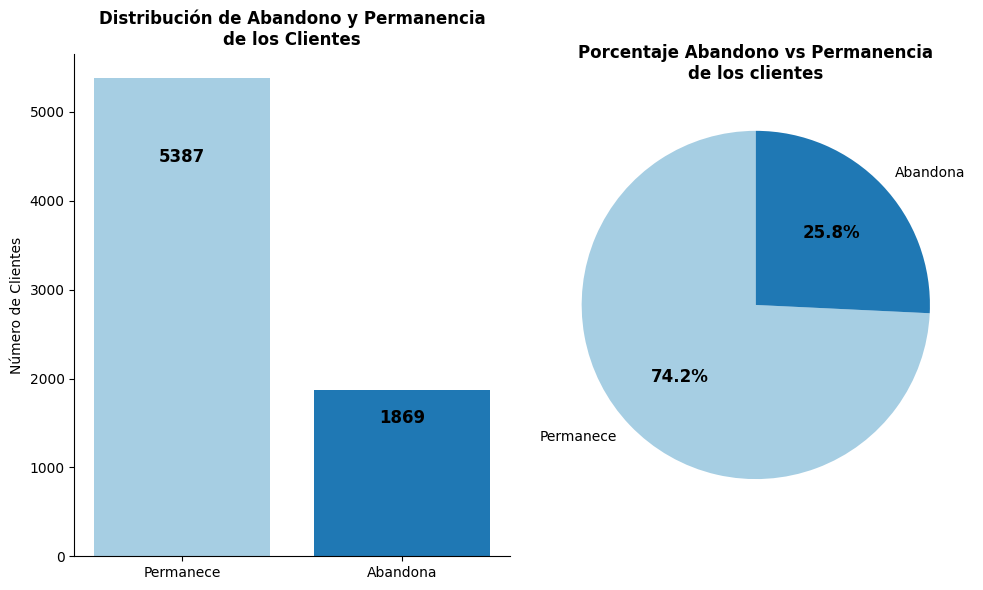

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

abandono_counts = telecom_df["abandono"].value_counts().sort_index()
abandono_props = telecom_df["abandono"].value_counts(normalize=True).sort_index()
labels = ["Permanecen", "Abandonan"]
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
colors = sns.color_palette("Paired")

# Gráfico de barras
bars = axs[0].bar(
    abandono_counts.index.map({0: 'Permanece', 1: 'Abandona'}),
    abandono_counts.values,
    color=colors
)

for ax in axs.flat:
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

axs[0].set_title('Distribución de Abandono y Permanencia\nde los Clientes', fontsize=12, weight='bold', loc='center')
axs[0].set_ylabel('Número de Clientes')

# Texto dentro de las barras
for bar in bars:
    height = bar.get_height()
    axs[0].text(
        bar.get_x() + bar.get_width() / 2,
        height /1.2,
        f'{height:.0f}',
        ha='center',
        va='center',
        fontsize=12,
        fontweight='bold',
        color='black')

axs[0].grid(False)

#gráfico circular
def custom_autopct(pct):
    return f'{pct:.1f}%'

wedges, texts, autotexts = axs[1].pie(
    abandono_counts.values,
    labels=abandono_counts.index.map({0: 'Permanece', 1: 'Abandona'}),
    autopct=custom_autopct,
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10})


for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

axs[1].set_title('Porcentaje Abandono vs Permanencia\nde los clientes', fontsize=12, weight='bold', loc='center')

plt.tight_layout()
plt.show()

###Recuento de evasión por variables categóricas

In [54]:
# Función auxiliar para ver distribución de abandono por cada categoría
def analizar_evasion_por_categoria(df, columna):
    cruzado = pd.crosstab(df[columna], df['abandono'], normalize='index') * 100
    cruzado.columns = ['% No Abandono', '% Abandono']
    print(f'\nAnálisis para: {columna}')
    print(cruzado)
    return cruzado

# Variables categóricas a analizar
categoricas = ['genero', 'tipo_contrato', 'metodo_pago', 'tipo_internet']

# Aplicar análisis
resultados = {}
for cat in categoricas:
    resultados[cat] = analizar_evasion_por_categoria(telecom_df, cat)


Análisis para: genero
        % No Abandono  % Abandono
genero                           
Female      73.822135   26.177865
Male        74.652494   25.347506

Análisis para: tipo_contrato
                % No Abandono  % Abandono
tipo_contrato                            
month to month      58.676654   41.323346
one year            89.064559   10.935441
two year            97.230237    2.769763

Análisis para: metodo_pago
                         % No Abandono  % Abandono
metodo_pago                                       
bank transfer automatic      83.742911   16.257089
credit card automatic        85.194639   14.805361
electronic check             56.196319   43.803681
mailed check                 81.412191   18.587809

Análisis para: tipo_internet
               % No Abandono  % Abandono
tipo_internet                           
DSL                81.514297   18.485703
Fiber optic        59.443402   40.556598
No                 92.825397    7.174603


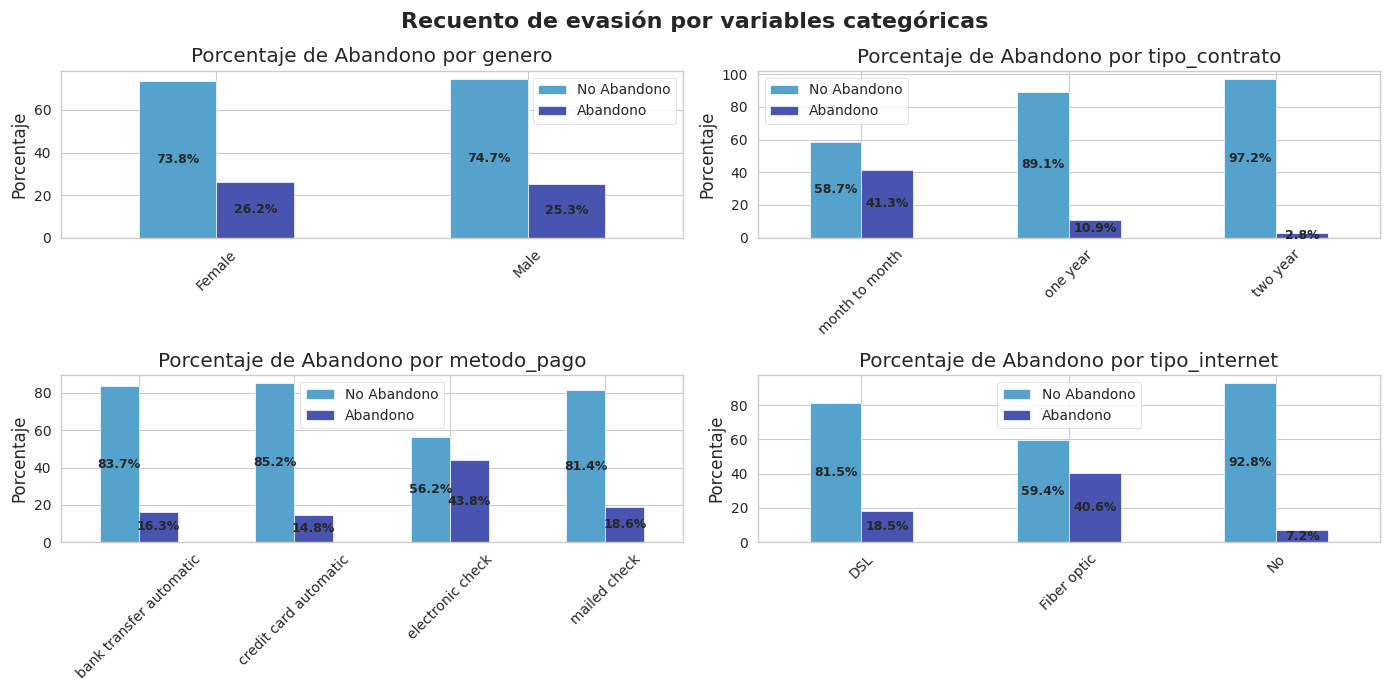

In [86]:
# Configuración de subplots: 2 columnas por fila
fig, axes = plt.subplots(nrows=(len(categoricas) + 1) // 2, ncols=2, figsize=(14, 7))
axes = axes.flatten()
colors = sns.color_palette("icefire")

# Crear cada gráfico en su subplot
for i, cat in enumerate(categoricas):
    cruzado = pd.crosstab(telecom_df[cat], telecom_df['abandono'], normalize='index') * 100  # Multiplicamos por 100 para tener %
    ax = axes[i]
    cruzado.plot(kind='bar', ax=ax, color=colors)

    ax.set_title(f'Porcentaje de Abandono por {cat}')
    ax.set_xlabel('')
    ax.set_ylabel('Porcentaje')
    ax.legend(['No Abandono', 'Abandono'])
    ax.tick_params(axis='x', rotation=45)

    # Añadir etiquetas de porcentaje sobre cada barra
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=9, weight='bold')

# Eliminar subplots vacíos si hay un número impar de gráficas
if len(categoricas) < len(axes):
    for j in range(len(categoricas), len(axes)):
        fig.delaxes(axes[j])

plt.suptitle('Recuento de evasión por variables categóricas', fontsize=16, weight='bold', ha='center')
plt.tight_layout()
plt.show()

###Análisis de evasión en columnas binarias

In [61]:
binarias = ['es_ciudadano_senior', 'tiene_pareja', 'tiene_dependientes', 'servicio_telefonico', 'factura_electronica']
def analizar_evasion_binarias(df, columna):
    # Mapeo opcional para mejor legibilidad (0 = No, 1 = Sí)
    df_temp = df.copy()
    df_temp[columna] = df_temp[columna].map({1: 'Sí', 0: 'No'})

    cruzado = pd.crosstab(df_temp[columna], df_temp['abandono'], normalize='index') * 100
    cruzado.columns = ['% No Abandono', '% Abandono']

    print(f'\nAnálisis para: {columna}')
    print(cruzado)
    return cruzado

# Resultados por columna binaria
resultados_binarios = {}
for col in binarias:
    resultados_binarios[col] = analizar_evasion_binarias(telecom_df, col)


Análisis para: es_ciudadano_senior
                     % No Abandono  % Abandono
es_ciudadano_senior                           
No                       77.066184   22.933816
Sí                       59.729272   40.270728

Análisis para: tiene_pareja
              % No Abandono  % Abandono
tiene_pareja                           
No                67.974380   32.025620
Sí                80.934739   19.065261

Análisis para: tiene_dependientes
                    % No Abandono  % Abandono
tiene_dependientes                           
No                      69.661817   30.338183
Sí                      84.976959   15.023041

Análisis para: servicio_telefonico
                     % No Abandono  % Abandono
servicio_telefonico                           
No                       75.886525   24.113475
Sí                       74.065028   25.934972

Análisis para: factura_electronica
                     % No Abandono  % Abandono
factura_electronica                           
No            

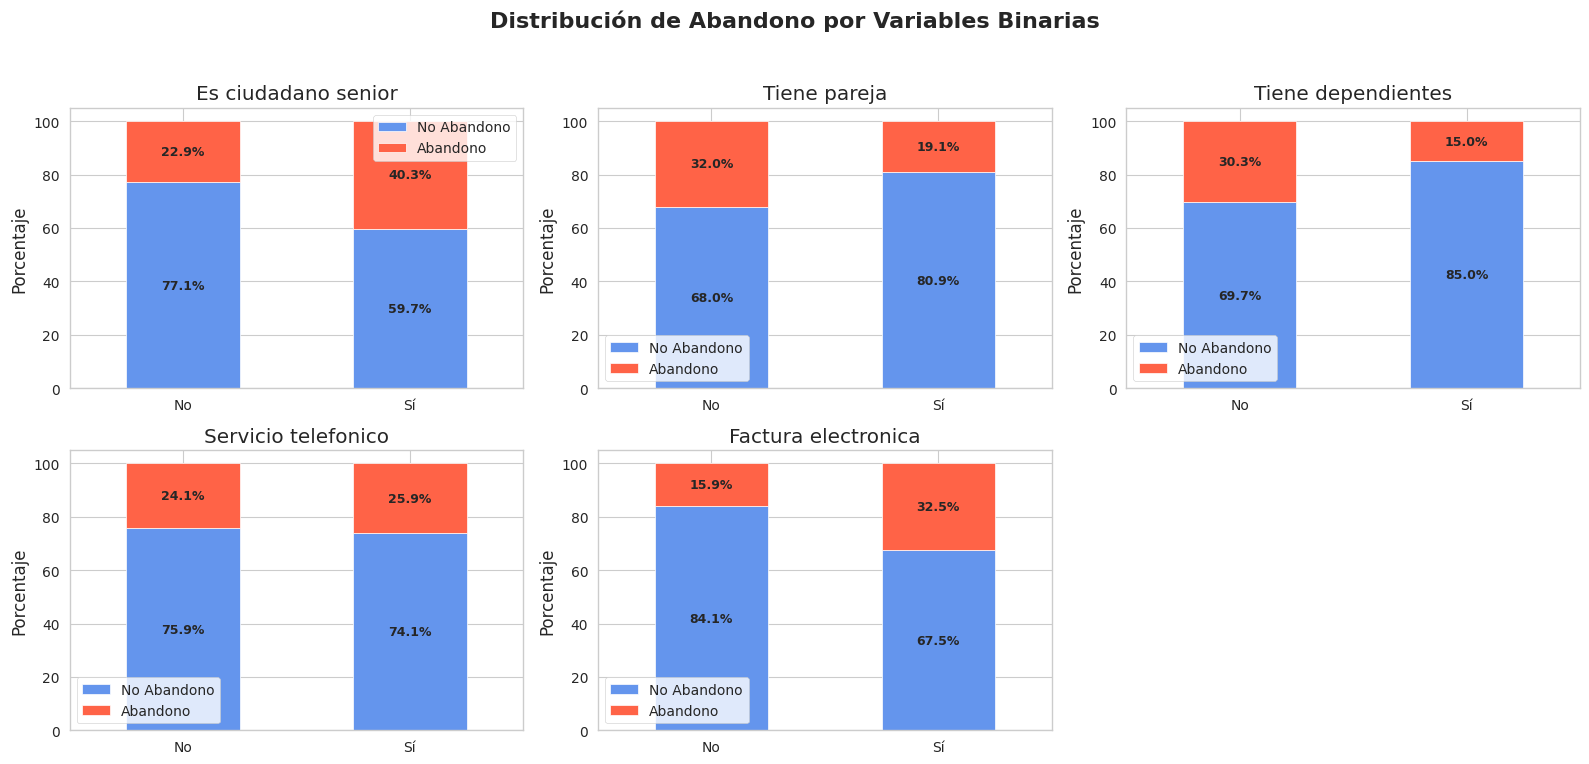

In [89]:
# Crear figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for idx, col in enumerate(binarias):
    df_temp = telecom_df.copy()
    df_temp[col] = df_temp[col].map({1: 'Sí', 0: 'No'})

    cruzado = pd.crosstab(df_temp[col], df_temp['abandono'], normalize='index') * 100
    cruzado.columns = ['No Abandono', 'Abandono']

    ax = axes[idx]
    cruzado.plot(kind='bar', stacked=True, color=['cornflowerblue', 'tomato'], ax=ax)
    ax.set_title(f'{col.replace("_", " ").capitalize()}')
    ax.set_ylabel('Porcentaje')
    ax.set_xlabel('')
    ax.legend(loc='best')
    ax.tick_params(axis='x', rotation=0)

    # Agregar etiquetas de porcentaje en cada barra
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=9, weight='bold')

# Eliminar subplot vacío si hay menos gráficas que espacios
if len(binarias) < len(axes):
    for j in range(len(binarias), len(axes)):
        fig.delaxes(axes[j])

plt.suptitle('Distribución de Abandono por Variables Binarias', fontsize=16, weight='bold', ha='center')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

###Conteo de evasión por variables numéricas

In [90]:
numericas = ['meses_en_empresa', 'cargos_mensuales', 'cargos_totales', 'cuentas_diarias']
def analizar_evasion_numericas(df, columnas, bins=4):

    resultados = {}

    for col in columnas:
        # Crear intervalos (bins)
        df[f'{col}_bin'] = pd.qcut(df[col], q=bins, duplicates='drop')

        # Tabla cruzada
        cruzado = pd.crosstab(df[f'{col}_bin'], df['abandono'], normalize='index') * 100
        cruzado.columns = ['% No Abandono', '% Abandono']

        print(f'\nAnálisis por rangos para: {col}')
        print(cruzado)

        resultados[col] = cruzado

    return resultados


resultados_numericas = analizar_evasion_numericas(telecom_df, numericas, bins=5)


Análisis por rangos para: meses_en_empresa
                      % No Abandono  % Abandono
meses_en_empresa_bin                           
(0.999, 6.0]              48.590164   51.409836
(6.0, 20.0]               67.456446   32.543554
(20.0, 40.0]              78.305785   21.694215
(40.0, 60.0]              84.924623   15.075377
(60.0, 72.0]              93.590627    6.409373

Análisis por rangos para: cargos_mensuales
                      % No Abandono  % Abandono
cargos_mensuales_bin                           
(18.249, 25.05]           91.114149    8.885851
(25.05, 58.7]             75.763889   24.236111
(58.7, 79.1]              71.114168   28.885832
(79.1, 94.3]              64.872326   35.127674
(94.3, 118.75]            68.206897   31.793103

Análisis por rangos para: cargos_totales
                    % No Abandono  % Abandono
cargos_totales_bin                           
(18.799, 266.6]         55.509642   44.490358
(266.6, 939.7]          72.019297   27.980703
(939.7, 2033.8

In [91]:
import plotly.express as px


def graficar_barras_abandono_interactivo(df, columnas, bins=10):
    datos_plot = []

    for col in columnas:
        # Crear bins para la columna numérica
        df_temp = df.copy()
        df_temp[f'{col}_bin'] = pd.qcut(df[col], q=bins, duplicates='drop')

        # Convertir bin a string para evitar error al exportar
        df_temp[f'{col}_bin'] = df_temp[f'{col}_bin'].astype(str)

        # Calcular % de abandono agrupado por bin
        resumen = df_temp.groupby(f'{col}_bin', observed=True)['abandono'].mean().reset_index()
        resumen['abandono'] = resumen['abandono'] * 100
        resumen['variable'] = col

        resumen = resumen.rename(columns={f'{col}_bin': 'rango', 'abandono': 'porcentaje_abandono'})
        datos_plot.append(resumen)

    datos_todos = pd.concat(datos_plot)

    # Gráfico interactivo de barras agrupadas
    plotly_fig = px.bar(
        datos_todos,
        x='rango',
        y='porcentaje_abandono',
        color='variable',
        barmode='group',
        title='Porcentaje de abandono según variables numéricas',
        labels={'rango': 'Rango de valor', 'porcentaje_abandono': '% de abandono', 'variable': 'Variable'}
    )

    plotly_fig.update_layout(
        width=900,
        height=500,
        xaxis_tickangle=-45,
        template='plotly_white',
        font=dict(family='Arial', size=14, color='black')
    )

    plotly_fig.show()
    return plotly_fig

# Llamar la función
numericas = ['meses_en_empresa', 'cargos_mensuales', 'cargos_totales', 'cuentas_diarias']
plotly_figure_for_saving = graficar_barras_abandono_interactivo(telecom_df, numericas)

# Guardar como archivo
output_path = '/content/telecomx_evasion_clientes.html'
plotly_figure_for_saving.write_html(output_path)

###Mapa de calor de correlaciones (para variables numéricas)

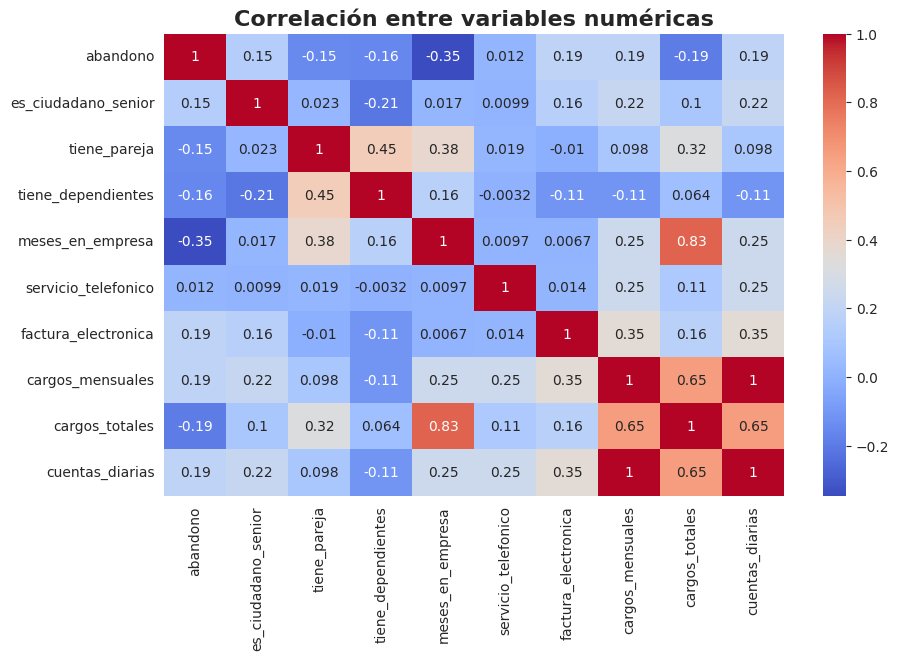

In [97]:
plt.figure(figsize=(10,6))
sns.heatmap(telecom_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlación entre variables numéricas", fontsize=16, weight='bold', ha='center')
plt.show()

#📄Informe final

### 📝 Informe de Análisis de Evasión de Clientes

**🔹 Objetivo del análisis**

Este estudio explora los factores que influyen en la pérdida de clientes en una empresa de telecomunicaciones. Identificar patrones de abandono permite tomar decisiones que mejoren la retención, un objetivo clave dada la dificultad y costo de adquirir nuevos usuarios.

**🔹 Preparación de los datos**

Los datos se obtuvieron desde una API y se procesaron eliminando nulos, duplicados y errores de formato. Se estandarizaron las categorías y se ajustaron los tipos de datos para facilitar el análisis.

**🔹 Exploración de datos**

El 25.8% de los clientes han cancelado el servicio. El abandono se relaciona principalmente con clientes que:

* Tienen contrato mensual y pagan electrónicamente.
* Son nuevos, adultos mayores o no tienen dependientes.
* Reciben factura electrónica.

No se encontraron diferencias significativas por género o por contar con servicio telefónico.

**🔹 Variables numéricas y correlaciones**

* **Meses en la empresa**: A mayor antigüedad, menor evasión (correlación -0.35).
* **Cargos mensuales altos** y **factura electrónica** se asocian con mayor abandono (correlaciones \~0.19).
* **Mayor gasto total** se vincula con menor cancelación, posiblemente por mayor satisfacción.

También se observó que el gasto total se relaciona fuertemente con el tiempo que lleva el cliente en la empresa (correlación 0.83).

**🔹 Conclusión**

El análisis muestra que la permanencia del cliente está relacionada con el tiempo que lleva en la empresa, lo que refuerza la importancia de fidelizar desde los primeros meses. Los clientes con contratos mensuales o métodos de pago electrónicos tienden a abandonar más, posiblemente por una menor percepción de compromiso o mayores expectativas digitales. Aunque se podría pensar que un mayor gasto mensual implica mayor lealtad, los datos indican lo contrario: algunos clientes con alto gasto también cancelan, lo que sugiere que la clave no está en el precio, sino en la percepción del valor recibido.


**💡 Recomendaciones finales**

* Diseñar incentivos para contratos a largo plazo.
* Brindar atención personalizada a nuevos clientes y adultos mayores.
* Mejorar la experiencia digital y revisar la estrategia de precios.
* Detectar perfiles en riesgo para actuar preventivamente.
